# IIASA 1.5$^{\circ}$C compatible pathways carbon-equivalent budgets

Written by Stuart Jenkins - stuart.jenkins@wadham.ox.ac.uk (02/01/19).

Code to check simple temperature-from-forcing-plus-CO$_2$emissions relationship to be defined in follow-on paper. 

### Concept: "Accounting for non-CO$_2$ forcing in outstanding carbon budgets"

Remaining warming is, for an ambitious mitigation scenario in which temperatures peak well before 2100 and non-CO$_2$ forcing increases or declines smoothly between now and the time of peak warming, well approximated by

\begin{equation}
    \Delta T = (\text{TCRE} \times G) + \frac{\text{TCR} \times (F_1 - F_0)}{F_{2\text{x}}} + \frac{[(\text{ECS}-\text{TCR})\times\Delta t \times F_0]}{d_2 \times F_{2\text{x}}}
\end{equation}

where $G$ is the cumulative remaining carbon budget to peak warming, $F_0$
is the mean global effective non-CO$_2$ foricng over the past 10-20 years, $F_1$ is the mean global effective non-CO$_2$ forcing over the 10-20 years prior to peak warming, $F_{2\text{x}}$ is the forcing due to doubled CO$_2$, $d_2$ is the long thermal response-time of the climate system and $\Delta t$ is the time to peak warming. 

Using the relationsship $TCR = F_{2\text{x}} \times \text{TCRE} \times \text{H } / \text{ AGWP}_\text{H}$, as noted in Allen _et al._, 2018 ('A solution to the misrepresentation of CO$_2$ equivalent emissions of short-lived climate pollutants under ambitious mitigation') we find

\begin{equation}
    \Delta T = \text{TCRE} \times \Big[G + \frac{\text{H}\times(F_1 - F_0 + \epsilon\Delta t F_0)}{\text{ AGWP}_\text{H}}\Big]
\end{equation}

where AGWP$_\text{H}$ is the AGWP of CO$_2$ over a time-horizon of H, and $\epsilon = \frac{(\text{ECS}-\text{TCR})}{\text{TCR} \times d_2}$. Therefore, $\epsilon$ represents the fractional rate of forcing decline required to maintain stable temperatures (around 0.3% per year). Flipping the above equation we can find the remaining carbon budget to a further $\Delta T$ degrees warming:

\begin{equation}
    G = \frac{\Delta T}{\text{TCRE}} - \frac{\text{H} \times (F_1 - F_0 + \epsilon\Delta t F_0)}{\text{AGWP}_{\text{H}}}.
\end{equation}

This makes it nice and clear how non-CO$_2$ forcing translates into CO$_2$-forcing-equivalent emissions (and hence how individual components could also be expressed in this way). All of the quantities in these equations (ECS, TCR, d2, AGWP_H, TCRE) are going to be assessed in AR6, and it will therefore be straightforward for anyone to assess whether they are consistent with estimated remaining carbon budgets.
<br>
<br>
<br>

### 1. Checking the relationship holds with 1.5-compatible scenarios

Here we use the IIASA database as our source of 1.5$^{\circ}C$-compatible pathways. The pyam package is used to import and filter the relevent datasets to check for consistency between model/scenario runs.

First we will use the 1.5$^{\circ}C$-compatible pathways from IIASA database to confirm the relationship works for standard ECS/TCR values. To do this we filter to have 1.5$^{\circ}C$-compatible CO$_2$ emissions scenarios and non-CO$_2$ radiative forcing timeseries to make them consistent (constining the same models and scenario runs). Then we use the simple climate model (SCM) FaIR to find the temperature response, $\Delta T$. We can calculate a carbon budget for each scenario using the above formula, and compare it to the actual carbon budget inputted.

### 2. Stress-testing the $\epsilon$ parameter

Beyond this a 'stress test' is performed on the parameter $\epsilon$, to understand the importance of the uncertainty in the ECS, TCR and $d_2$ values on predicting the carbon budget of these ambitious mitigation scenarios in this way.

<br>
<br>
## 1. Checks on initial assumptions

In [1]:
# First check location of python install
import sys
print(sys.executable)

# import pyam - IIASA provided package to manipulate IIASA database downloads
import pyam
# import other external packages to store data in an efficient way (pandas) and plot (matplotlib)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import numpy as np
from fair_scm import *
import scipy as sp

/Users/stuartjenkins/anaconda2/envs/python37/bin/python3


<IPython.core.display.Javascript object>

In [2]:
# import the datasets from subfolder "15_degree_compatible_scens_IIASA"
co2_ems_NotInRFFile_df = pyam.IamDataFrame(data='./15_degree_compatible_scens_IIASA/iamc15_15_compatible_co2ems.xlsx', encoding='utf-8')

co2_ems_df = pyam.IamDataFrame(data='./15_degree_compatible_scens_IIASA/iamc15_15_compatible_co2ems.xlsx', encoding='utf-8')

co2_RF_df = pyam.IamDataFrame(data='./15_degree_compatible_scens_IIASA/iamc15_15_compatible_co2forcing.xlsx', encoding='utf-8')

total_RF_df = pyam.IamDataFrame(data='./15_degree_compatible_scens_IIASA/iamc15_15_compatible_totalforcing.xlsx', encoding='utf-8')

INFO:root:Reading `./15_degree_compatible_scens_IIASA/iamc15_15_compatible_co2ems.xlsx`
INFO:root:Reading `./15_degree_compatible_scens_IIASA/iamc15_15_compatible_co2ems.xlsx`
INFO:root:Reading `./15_degree_compatible_scens_IIASA/iamc15_15_compatible_co2forcing.xlsx`
INFO:root:Reading `./15_degree_compatible_scens_IIASA/iamc15_15_compatible_totalforcing.xlsx`


In [3]:
# filter for scenarios which aren't in the RF files
for co2_rf_scen in co2_RF_df.scenarios():
    co2_ems_NotInRFFile_df = co2_ems_NotInRFFile_df.filter(scenario=co2_rf_scen, keep=False)
    
# filter for scenarios which are in all files
for co2_ems_notinRFfile_scen in co2_ems_NotInRFFile_df.scenarios():
    co2_ems_df = co2_ems_df.filter(scenario=co2_ems_notinRFfile_scen, keep=False)
    
    total_RF_df = total_RF_df.filter(scenario=co2_ems_notinRFfile_scen, keep=False)

# filter for models which aren't in the RF_files (i.e. remove POLES ADVANCE)
co2_ems_df = co2_ems_df.filter(model='POLES ADVANCE', keep=False)

In [4]:
# co2_ems_df.filter(variable='Emissions|CO2', region='World').line_plot(legend=False)

# co2_RF_df.filter(variable='Forcing|CO2', region='World').line_plot(legend=False)

# total_RF_df.filter(variable='Forcing', region='World').line_plot(legend=False)

TCR:  1.75 K
ECS:  2.6 K
calculated TCRE:  1.456409443807346 K/TtC


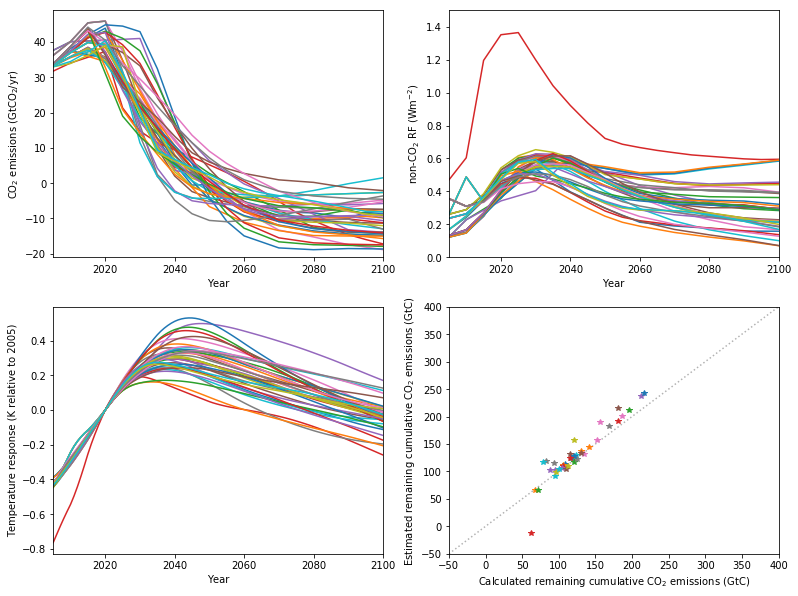

In [5]:
# what is the year we run the comparison from (chosen because we need 20 years of non-CO2 forcing data find F_0)
year_val = 2020
non_co2_forcing_average_over = 15

# Parameter values
TCR_val = 1.75
ECS_val = 2.6
d_array = np.array([239.0,4.1])
F_2x = 3.74
C_0 = 278.0
H = 100 # size of integration for AGWP calculation
input_yr = 10 # year of pulse CO2 injection to calc AGWP value
# produce pulse CO2 emissions timeseries
pulse_ems = np.zeros(150)
pulse_ems[input_yr] = 1000.
# run through FaIR with parameters (TCR,ECS,d,F_2x,C_0) as given above
C_pulse, T_pulse = fair_scm(emissions=pulse_ems, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x)
# calculate RF response from concentration response using log-relationship
RF_pulse = F_2x * np.log(C_pulse / C_0) / np.log(2)
# integrate for AGWP value in year H
AGWP = np.cumsum(RF_pulse)
# calculate TCRE value using formula in M. Allen et al.'s npj paper
TCRE = (TCR_val * AGWP[H+input_yr]) / (H * F_2x)

print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')

# interpolate data to 1-year spacing and find temperature response

fig_check, ax_check = plt.subplots(2,2, figsize=(13,10))
ax_check[0,0].set_xlabel('Year')
ax_check[0,0].set_ylabel('CO$_2$ emissions (GtCO$_2$/yr)')
ax_check[0,1].set_xlabel('Year')
ax_check[0,1].set_ylabel('non-CO$_2$ RF (Wm$^{-2}$)')
ax_check[1,0].set_xlabel('Year')
ax_check[1,0].set_ylabel('Temperature response (K relative to 2005)')
ax_check[1,1].set_xlabel('Calculated remaining cumulative CO$_2$ emissions (GtC)')
ax_check[1,1].set_ylabel('Estimated remaining cumulative CO$_2$ emissions (GtC)')
ax_check[1,1].plot([-50,400], [-50,400], ':', color='black', alpha=0.3)
ax_check[1,1].set_xlim(-50,400)
ax_check[1,1].set_ylim(-50,400)
ax_check[0,1].set_xlim(2005,2100)
ax_check[0,1].set_ylim(0,1.5)
ax_check[1,0].set_xlim(2005,2100)
# ax_check[1,0].set_ylim(0.0, 1.1)
ax_check[0,0].set_xlim(2005,2100)
ax_check[0,0].set_ylim(-21,49)

for scen in co2_ems_df.scenarios():
    for mod in co2_RF_df.filter(scenario=scen).models():
        scen_to_interpolate_co2ems = co2_ems_df.filter(scenario=scen,model=mod, variable='Emissions|CO2',region='World')
    
        vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').value
        index_vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').index
        vals_interp_co2ems = np.interp(np.arange(index_vals_co2ems[0],index_vals_co2ems[-1] + 1), index_vals_co2ems, vals_co2ems)

        
        # same for co2 forcing
        scen_to_interpolate_co2RF = co2_RF_df.filter(scenario=scen,model=mod, variable='Forcing|CO2',region='World').as_pandas()

        vals_co2RF = scen_to_interpolate_co2RF.value.values[scen_to_interpolate_co2RF.value.values!=0]
        index_vals_co2RF = scen_to_interpolate_co2RF.year.values[scen_to_interpolate_co2RF.value.values!=0]
        vals_interp_co2RF = np.interp(np.arange(index_vals_co2RF[0],index_vals_co2RF[-1]+1),index_vals_co2RF,vals_co2RF)

        
        # same for total forcing
        scen_to_interpolate_totRF = total_RF_df.filter(scenario=scen,model=mod, variable='Forcing',region='World').as_pandas()
    
        vals_totRF = scen_to_interpolate_totRF.value.values[scen_to_interpolate_totRF.value.values!=0]
        index_vals_totRF = scen_to_interpolate_totRF.year.values[scen_to_interpolate_totRF.value.values!=0]
        vals_interp_totRF = np.interp(np.arange(index_vals_totRF[0],index_vals_totRF[-1]+1),index_vals_totRF,vals_totRF)
    
        vals_non_co2_RF = vals_interp_totRF - vals_interp_co2RF
        full_index = np.arange(index_vals_co2RF[0],index_vals_co2RF[-1] + 1)
    
    
        # run each scenario through FaIR
        C_run, T_run = fair_scm(emissions=vals_interp_co2ems*12./44000., other_rf=vals_interp_totRF-vals_interp_co2RF, tcrecs=np.array([TCR_val,ECS_val]), d=d_array)
        
        ax_check[0,0].plot(full_index, vals_interp_co2ems/1000.) # , color='royalblue')
        ax_check[0,1].plot(full_index, vals_non_co2_RF) # , color='royalblue')
        ax_check[1,0].plot(full_index, T_run - T_run[full_index == year_val]) # , color='royalblue')

        
        # find epsilon and carbon budget to temp peak
        temp_peak_val = np.max(T_run)
        year_of_temp_peak = full_index[T_run == temp_peak_val]
        epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])
        
        F_1 = np.mean(vals_non_co2_RF[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
        F_0 = np.mean(vals_non_co2_RF[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))]) # 0.1
        
#         print(F_0, "\t", F_1)
#         print((epsilon * F_0 * (year_of_temp_peak-year_val))*H*1000/AGWP[H+input_yr])
        
        G_estimated = (((temp_peak_val-T_run[full_index == year_val]) / TCRE) - ((H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_0)) / (AGWP[H+input_yr])))*1000.
        
        G_calculated = np.sum(vals_interp_co2ems[full_index<=year_of_temp_peak]*12./44000.) - np.sum(vals_interp_co2ems[full_index<=year_val]*12./44000.)
        
        ax_check[1,1].plot(G_calculated, G_estimated, '*') # , color='royalblue')

# fig_check.savefig('all_scens_tcr175ecs260.pdf',dpi=300)

# Find average position of calculated to estimated remaining emissions for range of TCR values

TCR:  1.5 K
ECS:  1.5 K
calculated TCRE:  1.2360409622602215 K/TtC
TCR:  1.5 K
ECS:  2.0 K
calculated TCRE:  1.2350027978598146 K/TtC
TCR:  1.5 K
ECS:  2.5 K
calculated TCRE:  1.2339323200339338 K/TtC
TCR:  1.5 K
ECS:  3.0 K
calculated TCRE:  1.2328301404161357 K/TtC
TCR:  1.5 K
ECS:  3.5 K
calculated TCRE:  1.2316968799636827 K/TtC
TCR:  1.5 K
ECS:  4.0 K
calculated TCRE:  1.2305331684728185 K/TtC
TCR:  1.5 K
ECS:  4.5 K
calculated TCRE:  1.2293396441083237 K/TtC
TCR:  1.0 K
ECS:  2.6 K
calculated TCRE:  0.803114055086807 K/TtC
TCR:  1.25 K
ECS:  2.6 K
calculated TCRE:  1.0159553819380363 K/TtC
TCR:  1.5 K
ECS:  2.6 K
calculated TCRE:  1.233714400514205 K/TtC
TCR:  1.75 K
ECS:  2.6 K
calculated TCRE:  1.456409443807346 K/TtC
TCR:  2.0 K
ECS:  2.6 K
calculated TCRE:  1.6840435802829554 K/TtC
TCR:  2.25 K
ECS:  2.6 K
calculated TCRE:  1.9166066896806473 K/TtC
TCR:  2.5 K
ECS:  2.6 K
calculated TCRE:  2.1540773490838374 K/TtC


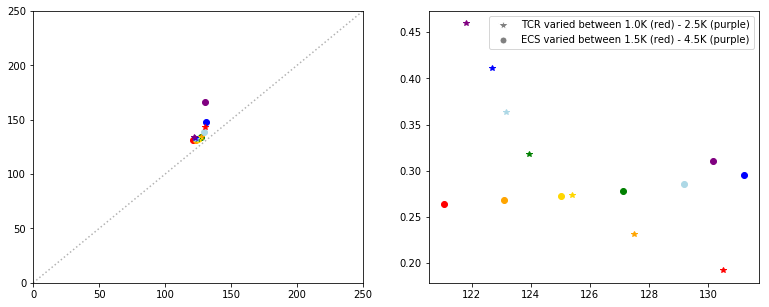

In [6]:

# what is the year we run the comparison from (chosen because we need 20 years of non-CO2 forcing data find F_0)
year_val = 2020
non_co2_forcing_average_over = 15 # this is an important parameter in determining if you sit above or below line!!

fig_1, ax_1 = plt.subplots(1,2, figsize=(13,5))
ax_1[0].set_xlim(0,250)
ax_1[0].set_ylim(0,250)
ax_1[0].plot([0,300],[0,300],color='black', alpha=0.3, linestyle=':')

ECSs = np.array([1.5,2.0,2.5,3.0,3.5,4.0,4.5])
colors = ['red','orange','gold','green','lightblue','blue','purple']

for i, ECS_val in enumerate(ECSs):
    calc_G = []
    estim_G = []
    calc_deltaT = []

    # Parameter values
    TCR_val = 1.5
    # ECS_val = 2.6
    d_array = np.array([239.0,4.1])
    F_2x = 3.74
    C_0 = 278.0
    H = 100 # size of integration for AGWP calculation
    input_yr = 10 # year of pulse CO2 injection to calc AGWP value
    # produce pulse CO2 emissions timeseries
    pulse_ems = np.zeros(150)
    pulse_ems[input_yr] = 1000.
    # run through FaIR with parameters (TCR,ECS,d,F_2x,C_0) as given above
    C_pulse, T_pulse = fair_scm(emissions=pulse_ems, tcrecs=np.array([TCR_val,ECSs[i]]), d=d_array, C_0=C_0, F_2x=F_2x)
    # calculate RF response from concentration response using log-relationship
    RF_pulse = F_2x * np.log(C_pulse / C_0) / np.log(2)
    # integrate for AGWP value in year H
    AGWP = np.cumsum(RF_pulse)
    # calculate TCRE value using formula in M. Allen et al.'s npj paper
    TCRE = (TCR_val * AGWP[H+input_yr]) / (H * F_2x)

    print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')

    for scen in co2_ems_df.scenarios():
        for mod in co2_RF_df.filter(scenario=scen).models():
            scen_to_interpolate_co2ems = co2_ems_df.filter(scenario=scen,model=mod, variable='Emissions|CO2',region='World')

            vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').value
            index_vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').index
            vals_interp_co2ems = np.interp(np.arange(index_vals_co2ems[0],index_vals_co2ems[-1] + 1), index_vals_co2ems, vals_co2ems)


            # same for co2 forcing
            scen_to_interpolate_co2RF = co2_RF_df.filter(scenario=scen,model=mod, variable='Forcing|CO2',region='World').as_pandas()

            vals_co2RF = scen_to_interpolate_co2RF.value.values[scen_to_interpolate_co2RF.value.values!=0]
            index_vals_co2RF = scen_to_interpolate_co2RF.year.values[scen_to_interpolate_co2RF.value.values!=0]
            vals_interp_co2RF = np.interp(np.arange(index_vals_co2RF[0],index_vals_co2RF[-1]+1),index_vals_co2RF,vals_co2RF)


            # same for total forcing
            scen_to_interpolate_totRF = total_RF_df.filter(scenario=scen,model=mod, variable='Forcing',region='World').as_pandas()

            vals_totRF = scen_to_interpolate_totRF.value.values[scen_to_interpolate_totRF.value.values!=0]
            index_vals_totRF = scen_to_interpolate_totRF.year.values[scen_to_interpolate_totRF.value.values!=0]
            vals_interp_totRF = np.interp(np.arange(index_vals_totRF[0],index_vals_totRF[-1]+1),index_vals_totRF,vals_totRF)

            vals_non_co2_RF = vals_interp_totRF - vals_interp_co2RF
            full_index = np.arange(index_vals_co2RF[0],index_vals_co2RF[-1] + 1)


            # run each scenario through FaIR
            C_run, T_run = fair_scm(emissions=vals_interp_co2ems*12./44000., other_rf=vals_interp_totRF-vals_interp_co2RF, tcrecs=np.array([TCR_val,ECSs[i]]), d=d_array)


            # find epsilon and carbon budget to temp peak
            temp_peak_val = np.max(T_run)
            year_of_temp_peak = full_index[T_run == temp_peak_val]
            epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])

            F_1 = np.mean(vals_non_co2_RF[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
            F_0 = np.mean(vals_non_co2_RF[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))]) # 0.1

            G_estimated = (((temp_peak_val-T_run[full_index == year_val]) / TCRE) - ((H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_0)) / (AGWP[H+input_yr])))*1000.
            estim_G.append(G_estimated)

            G_calculated = np.sum(vals_interp_co2ems[full_index<=year_of_temp_peak]*12./44000.) - np.sum(vals_interp_co2ems[full_index<=year_val]*12./44000.)
            calc_G.append(G_calculated)

            deltaT_calculated = temp_peak_val - T_run[full_index == year_val]
            calc_deltaT.append(deltaT_calculated)

    ax_1[0].plot(np.mean(calc_G), np.mean(estim_G), 'o', color=colors[i])

    ax_1[1].plot(np.mean(calc_G), np.mean(calc_deltaT), 'o', color=colors[i])






# now do same but for TCRs varied independent of ECS value
TCRs = np.array([1.0,1.25,1.5,1.75,2.0,2.25,2.5])

for i, TCR_val in enumerate(TCRs):
    calc_G = []
    estim_G = []
    calc_deltaT = []

    # Parameter values
    # TCR_val = 1.75
    ECS_val = 2.6
    d_array = np.array([239.0,4.1])
    F_2x = 3.74
    C_0 = 278.0
    H = 100 # size of integration for AGWP calculation
    input_yr = 10 # year of pulse CO2 injection to calc AGWP value
    # produce pulse CO2 emissions timeseries
    pulse_ems = np.zeros(150)
    pulse_ems[input_yr] = 1000.
    # run through FaIR with parameters (TCR,ECS,d,F_2x,C_0) as given above
    C_pulse, T_pulse = fair_scm(emissions=pulse_ems, tcrecs=np.array([TCRs[i],ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x)
    # calculate RF response from concentration response using log-relationship
    RF_pulse = F_2x * np.log(C_pulse / C_0) / np.log(2)
    # integrate for AGWP value in year H
    AGWP = np.cumsum(RF_pulse)
    # calculate TCRE value using formula in M. Allen et al.'s npj paper
    TCRE = (TCR_val * AGWP[H+input_yr]) / (H * F_2x)

    print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')

    for scen in co2_ems_df.scenarios():
        for mod in co2_RF_df.filter(scenario=scen).models():
            scen_to_interpolate_co2ems = co2_ems_df.filter(scenario=scen,model=mod, variable='Emissions|CO2',region='World')

            vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').value
            index_vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').index
            vals_interp_co2ems = np.interp(np.arange(index_vals_co2ems[0],index_vals_co2ems[-1] + 1), index_vals_co2ems, vals_co2ems)


            # same for co2 forcing
            scen_to_interpolate_co2RF = co2_RF_df.filter(scenario=scen,model=mod, variable='Forcing|CO2',region='World').as_pandas()

            vals_co2RF = scen_to_interpolate_co2RF.value.values[scen_to_interpolate_co2RF.value.values!=0]
            index_vals_co2RF = scen_to_interpolate_co2RF.year.values[scen_to_interpolate_co2RF.value.values!=0]
            vals_interp_co2RF = np.interp(np.arange(index_vals_co2RF[0],index_vals_co2RF[-1]+1),index_vals_co2RF,vals_co2RF)


            # same for total forcing
            scen_to_interpolate_totRF = total_RF_df.filter(scenario=scen,model=mod, variable='Forcing',region='World').as_pandas()

            vals_totRF = scen_to_interpolate_totRF.value.values[scen_to_interpolate_totRF.value.values!=0]
            index_vals_totRF = scen_to_interpolate_totRF.year.values[scen_to_interpolate_totRF.value.values!=0]
            vals_interp_totRF = np.interp(np.arange(index_vals_totRF[0],index_vals_totRF[-1]+1),index_vals_totRF,vals_totRF)

            vals_non_co2_RF = vals_interp_totRF - vals_interp_co2RF
            full_index = np.arange(index_vals_co2RF[0],index_vals_co2RF[-1] + 1)


            # run each scenario through FaIR
            C_run, T_run = fair_scm(emissions=vals_interp_co2ems*12./44000., other_rf=vals_interp_totRF-vals_interp_co2RF, tcrecs=np.array([TCRs[i],ECS_val]), d=d_array)


            # find epsilon and carbon budget to temp peak
            temp_peak_val = np.max(T_run)
            year_of_temp_peak = full_index[T_run == temp_peak_val]
            epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])

            F_1 = np.mean(vals_non_co2_RF[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
            F_0 = np.mean(vals_non_co2_RF[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))]) # 0.1

            G_estimated = (((temp_peak_val-T_run[full_index == year_val]) / TCRE) - ((H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_0)) / (AGWP[H+input_yr])))*1000.
            estim_G.append(G_estimated)

            G_calculated = np.sum(vals_interp_co2ems[full_index<=year_of_temp_peak]*12./44000.) - np.sum(vals_interp_co2ems[full_index<=year_val]*12./44000.)
            calc_G.append(G_calculated)

            deltaT_calculated = temp_peak_val - T_run[full_index == year_val]
            calc_deltaT.append(deltaT_calculated)

    ax_1[0].plot(np.mean(calc_G), np.mean(estim_G), '*', color=colors[i])

    ax_1[1].plot(np.mean(calc_G), np.mean(calc_deltaT), '*', color=colors[i])


legend_elements = [Line2D([0], [0], marker='*', color='w', label='TCR varied between 1.0K (red) - 2.5K (purple)',markerfacecolor='grey', markersize=11),
                   Line2D([0], [0], marker='o', color='w', label='ECS varied between 1.5K (red) - 4.5K (purple)',markerfacecolor='grey', markersize=7)]

ax_1[1].legend(handles=legend_elements, loc='upper right')

2020
10
15
20
2025
10
15
20
2030
10
15
20


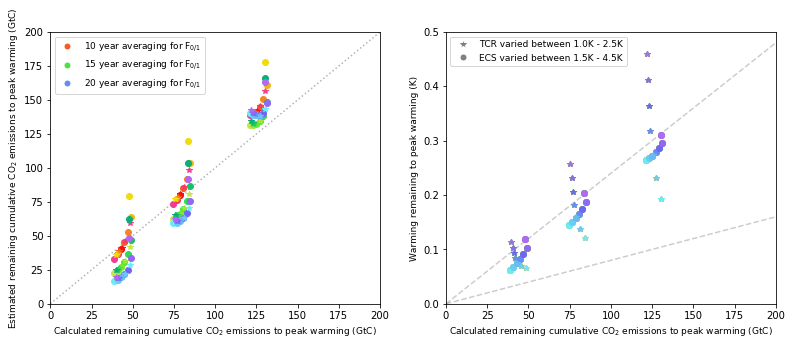

In [20]:
blues = ((103/255.,238/255.,245/255.),(103/255.,205/255.,245/255.),(103/255.,188/255.,245/255.),(103/255.,141/255.,245/255.),(110/255.,103/255.,245/255.),(148/255.,103/255.,245/255.),(180/255.,103/255.,245/255.))
greens = ((198/255.,230/255.,71/255.),(164/255.,232/255.,53/255.),(119/255.,232/255.,53/255.),(75/255.,227/255.,61/255.),(57/255.,212/255.,88/255.),(27/255.,191/255.,106/255.),(8/255.,175/255.,120/255.))
reds = ((242/255.,61/255.,145/255.),(242/255.,61/255.,103/255.),(247/255.,15/255.,15/255.),(245/255.,94/255.,34/255.),(245/255.,134/255.,37/255.),(242/255.,183/255.,19/255.),(242/255.,220/255.,5/255.))

fig_1, ax_1 = plt.subplots(1,2, figsize=(13,5))
ax_1[0].set_xlim(0,200)
ax_1[0].set_ylim(0,200)
ax_1[1].set_xlim(0,200)
ax_1[1].set_ylim(0,0.5)
ax_1[0].plot([0,300],[0,300],color='black', alpha=0.3, linestyle=':')
ax_1[0].set_xlabel('Calculated remaining cumulative CO$_2$ emissions to peak warming (GtC)', fontsize=9)
ax_1[0].set_ylabel('Estimated remaining cumulative CO$_2$ emissions to peak warming (GtC)', fontsize=9)
ax_1[1].set_xlabel('Calculated remaining cumulative CO$_2$ emissions to peak warming (GtC)', fontsize=9)
ax_1[1].set_ylabel('Warming remaining to peak warming (K)', fontsize=9)
ax_1[1].plot([0,1000],[0,0.8],color='black',alpha=0.2,linestyle='--')
ax_1[1].plot([0,1000],[0,2.4],color='black',alpha=0.2,linestyle='--')

for year_val in range(2020,2031,5):
    print(year_val)
    for non_co2_forcing_average_over in range(10,21,5):
        print(non_co2_forcing_average_over)
        # what is the year we run the comparison from (chosen because we need 20 years of non-CO2 forcing data find F_0)
#         year_val = 2020

        ECSs = np.array([1.5,2.0,2.5,3.0,3.5,4.0,4.5])
        if non_co2_forcing_average_over == 10:
            colors = reds
        elif non_co2_forcing_average_over == 15:
            colors = greens
        elif non_co2_forcing_average_over == 20:
            colors = blues
    #     colors = ['red','orange','gold','green','lightblue','blue','purple']

        for i, ECS_val in enumerate(ECSs):
            calc_G = []
            estim_G = []
            calc_deltaT = []

            # Parameter values
            TCR_val = 1.5
            # ECS_val = 2.6
            d_array = np.array([239.0,4.1])
            F_2x = 3.74
            C_0 = 278.0
            H = 100 # size of integration for AGWP calculation
            input_yr = 10 # year of pulse CO2 injection to calc AGWP value
            # produce pulse CO2 emissions timeseries
            pulse_ems = np.zeros(150)
            pulse_ems[input_yr] = 1000.
            # run through FaIR with parameters (TCR,ECS,d,F_2x,C_0) as given above
            C_pulse, T_pulse = fair_scm(emissions=pulse_ems, tcrecs=np.array([TCR_val,ECSs[i]]), d=d_array, C_0=C_0, F_2x=F_2x)
            # calculate RF response from concentration response using log-relationship
            RF_pulse = F_2x * np.log(C_pulse / C_0) / np.log(2)
            # integrate for AGWP value in year H
            AGWP = np.cumsum(RF_pulse)
            # calculate TCRE value using formula in M. Allen et al.'s npj paper
            TCRE = (TCR_val * AGWP[H+input_yr]) / (H * F_2x)

    #         print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')

            for scen in co2_ems_df.scenarios():
                for mod in co2_RF_df.filter(scenario=scen).models():
                    scen_to_interpolate_co2ems = co2_ems_df.filter(scenario=scen,model=mod, variable='Emissions|CO2',region='World')

                    vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').value
                    index_vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').index
                    vals_interp_co2ems = np.interp(np.arange(index_vals_co2ems[0],index_vals_co2ems[-1] + 1), index_vals_co2ems, vals_co2ems)


                    # same for co2 forcing
                    scen_to_interpolate_co2RF = co2_RF_df.filter(scenario=scen,model=mod, variable='Forcing|CO2',region='World').as_pandas()

                    vals_co2RF = scen_to_interpolate_co2RF.value.values[scen_to_interpolate_co2RF.value.values!=0]
                    index_vals_co2RF = scen_to_interpolate_co2RF.year.values[scen_to_interpolate_co2RF.value.values!=0]
                    vals_interp_co2RF = np.interp(np.arange(index_vals_co2RF[0],index_vals_co2RF[-1]+1),index_vals_co2RF,vals_co2RF)


                    # same for total forcing
                    scen_to_interpolate_totRF = total_RF_df.filter(scenario=scen,model=mod, variable='Forcing',region='World').as_pandas()

                    vals_totRF = scen_to_interpolate_totRF.value.values[scen_to_interpolate_totRF.value.values!=0]
                    index_vals_totRF = scen_to_interpolate_totRF.year.values[scen_to_interpolate_totRF.value.values!=0]
                    vals_interp_totRF = np.interp(np.arange(index_vals_totRF[0],index_vals_totRF[-1]+1),index_vals_totRF,vals_totRF)

                    vals_non_co2_RF = vals_interp_totRF - vals_interp_co2RF
                    full_index = np.arange(index_vals_co2RF[0],index_vals_co2RF[-1] + 1)


                    # run each scenario through FaIR
                    C_run, T_run = fair_scm(emissions=vals_interp_co2ems*12./44000., other_rf=vals_interp_totRF-vals_interp_co2RF, tcrecs=np.array([TCR_val,ECSs[i]]), d=d_array)


                    # find epsilon and carbon budget to temp peak
                    temp_peak_val = np.max(T_run)
                    year_of_temp_peak = full_index[T_run == temp_peak_val]
                    epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])

                    F_1 = np.mean(vals_non_co2_RF[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
                    F_0 = np.mean(vals_non_co2_RF[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))]) # 0.1

                    G_estimated = (((temp_peak_val-T_run[full_index == year_val]) / TCRE) - ((H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_0)) / (AGWP[H+input_yr])))*1000.
                    estim_G.append(G_estimated)

                    G_calculated = np.sum(vals_interp_co2ems[full_index<=year_of_temp_peak]*12./44000.) - np.sum(vals_interp_co2ems[full_index<=year_val]*12./44000.)
                    calc_G.append(G_calculated)

                    deltaT_calculated = temp_peak_val - T_run[full_index == year_val]
                    calc_deltaT.append(deltaT_calculated)

            ax_1[0].plot(np.mean(calc_G), np.mean(estim_G), 'o', color=colors[i])

            ax_1[1].plot(np.mean(calc_G), np.mean(calc_deltaT), 'o', color=colors[i])






        # now do same but for TCRs varied independent of ECS value
        TCRs = np.array([1.0,1.25,1.5,1.75,2.0,2.25,2.5])

        for i, TCR_val in enumerate(TCRs):
            calc_G = []
            estim_G = []
            calc_deltaT = []

            # Parameter values
            # TCR_val = 1.75
            ECS_val = 2.6
            d_array = np.array([239.0,4.1])
            F_2x = 3.74
            C_0 = 278.0
            H = 100 # size of integration for AGWP calculation
            input_yr = 10 # year of pulse CO2 injection to calc AGWP value
            # produce pulse CO2 emissions timeseries
            pulse_ems = np.zeros(150)
            pulse_ems[input_yr] = 1000.
            # run through FaIR with parameters (TCR,ECS,d,F_2x,C_0) as given above
            C_pulse, T_pulse = fair_scm(emissions=pulse_ems, tcrecs=np.array([TCRs[i],ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x)
            # calculate RF response from concentration response using log-relationship
            RF_pulse = F_2x * np.log(C_pulse / C_0) / np.log(2)
            # integrate for AGWP value in year H
            AGWP = np.cumsum(RF_pulse)
            # calculate TCRE value using formula in M. Allen et al.'s npj paper
            TCRE = (TCR_val * AGWP[H+input_yr]) / (H * F_2x)

#             print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')

            for scen in co2_ems_df.scenarios():
                for mod in co2_RF_df.filter(scenario=scen).models():
                    scen_to_interpolate_co2ems = co2_ems_df.filter(scenario=scen,model=mod, variable='Emissions|CO2',region='World')

                    vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').value
                    index_vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').index
                    vals_interp_co2ems = np.interp(np.arange(index_vals_co2ems[0],index_vals_co2ems[-1] + 1), index_vals_co2ems, vals_co2ems)


                    # same for co2 forcing
                    scen_to_interpolate_co2RF = co2_RF_df.filter(scenario=scen,model=mod, variable='Forcing|CO2',region='World').as_pandas()

                    vals_co2RF = scen_to_interpolate_co2RF.value.values[scen_to_interpolate_co2RF.value.values!=0]
                    index_vals_co2RF = scen_to_interpolate_co2RF.year.values[scen_to_interpolate_co2RF.value.values!=0]
                    vals_interp_co2RF = np.interp(np.arange(index_vals_co2RF[0],index_vals_co2RF[-1]+1),index_vals_co2RF,vals_co2RF)


                    # same for total forcing
                    scen_to_interpolate_totRF = total_RF_df.filter(scenario=scen,model=mod, variable='Forcing',region='World').as_pandas()

                    vals_totRF = scen_to_interpolate_totRF.value.values[scen_to_interpolate_totRF.value.values!=0]
                    index_vals_totRF = scen_to_interpolate_totRF.year.values[scen_to_interpolate_totRF.value.values!=0]
                    vals_interp_totRF = np.interp(np.arange(index_vals_totRF[0],index_vals_totRF[-1]+1),index_vals_totRF,vals_totRF)

                    vals_non_co2_RF = vals_interp_totRF - vals_interp_co2RF
                    full_index = np.arange(index_vals_co2RF[0],index_vals_co2RF[-1] + 1)


                    # run each scenario through FaIR
                    C_run, T_run = fair_scm(emissions=vals_interp_co2ems*12./44000., other_rf=vals_interp_totRF-vals_interp_co2RF, tcrecs=np.array([TCRs[i],ECS_val]), d=d_array)


                    # find epsilon and carbon budget to temp peak
                    temp_peak_val = np.max(T_run)
                    year_of_temp_peak = full_index[T_run == temp_peak_val]
                    epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])

                    F_1 = np.mean(vals_non_co2_RF[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
                    F_0 = np.mean(vals_non_co2_RF[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))]) # 0.1

                    G_estimated = (((temp_peak_val-T_run[full_index == year_val]) / TCRE) - ((H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_0)) / (AGWP[H+input_yr])))*1000.
                    estim_G.append(G_estimated)

                    G_calculated = np.sum(vals_interp_co2ems[full_index<=year_of_temp_peak]*12./44000.) - np.sum(vals_interp_co2ems[full_index<=year_val]*12./44000.)
                    calc_G.append(G_calculated)

                    deltaT_calculated = temp_peak_val - T_run[full_index == year_val]
                    calc_deltaT.append(deltaT_calculated)

            ax_1[0].plot(np.mean(calc_G), np.mean(estim_G), '*', color=colors[i])

            ax_1[1].plot(np.mean(calc_G), np.mean(calc_deltaT), '*', color=colors[i])


legend_elements1 = [Line2D([0], [0], marker='*', color='w', label='TCR varied between 1.0K - 2.5K',markerfacecolor='grey', markersize=11),
                   Line2D([0], [0], marker='o', color='w', label='ECS varied between 1.5K - 4.5K',markerfacecolor='grey', markersize=7)]

legend_elements0 = [Line2D([0], [0], marker='o', color='w', label='10 year averaging for F$_{0/1}$',markerfacecolor=reds[3], markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='15 year averaging for F$_{0/1}$',markerfacecolor=greens[3], markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='20 year averaging for F$_{0/1}$',markerfacecolor=blues[3], markersize=7)]

ax_1[0].legend(handles=legend_elements0, loc='upper left', fontsize=9)
ax_1[1].legend(handles=legend_elements1, loc='upper left', fontsize=9)
    
# fig_1.savefig('test_all_multiple_startyrs.pdf',dpi=300)

In [48]:
# blues = ((103/255.,238/255.,245/255.),(103/255.,205/255.,245/255.),(103/255.,188/255.,245/255.),(103/255.,141/255.,245/255.),(110/255.,103/255.,245/255.),(148/255.,103/255.,245/255.),(180/255.,103/255.,245/255.))
# greens = ((198/255.,230/255.,71/255.),(164/255.,232/255.,53/255.),(119/255.,232/255.,53/255.),(75/255.,227/255.,61/255.),(57/255.,212/255.,88/255.),(27/255.,191/255.,106/255.),(8/255.,175/255.,120/255.))
# reds = ((242/255.,61/255.,145/255.),(242/255.,61/255.,103/255.),(247/255.,15/255.,15/255.),(245/255.,94/255.,34/255.),(245/255.,134/255.,37/255.),(242/255.,183/255.,19/255.),(242/255.,220/255.,5/255.))

# fig_1, ax_1 = plt.subplots(1,2, figsize=(13,5))
# ax_1[0].set_xlim(0,200)
# ax_1[0].set_ylim(0,200)
# ax_1[1].set_xlim(0,200)
# ax_1[1].set_ylim(0,0.5)
# ax_1[0].plot([0,300],[0,300],color='black', alpha=0.3, linestyle=':')
# ax_1[0].set_xlabel('Calculated remaining cumulative CO$_2$ emissions to peak warming (GtC)', fontsize=9)
# ax_1[0].set_ylabel('Estimated remaining cumulative CO$_2$ emissions to peak warming (GtC)', fontsize=9)
# ax_1[1].set_xlabel('Calculated remaining cumulative CO$_2$ emissions to peak warming (GtC)', fontsize=9)
# ax_1[1].set_ylabel('Warming remaining to peak warming (K)', fontsize=9)
# ax_1[1].plot([0,1000],[0,0.8],color='black',alpha=0.2,linestyle='--')
# ax_1[1].plot([0,1000],[0,2.4],color='black',alpha=0.2,linestyle='--')

# for year_val in range(2020,2031,5):
#     print(year_val)
#     for non_co2_forcing_average_over in range(10,21,5):
#         print(non_co2_forcing_average_over)
#         # what is the year we run the comparison from (chosen because we need 20 years of non-CO2 forcing data find F_0)
# #         year_val = 2020

#         ECSs = np.array([1.5,2.0,2.5,3.0,3.5,4.0,4.5])
#         if non_co2_forcing_average_over == 10:
#             colors = reds
#         elif non_co2_forcing_average_over == 15:
#             colors = greens
#         elif non_co2_forcing_average_over == 20:
#             colors = blues
#     #     colors = ['red','orange','gold','green','lightblue','blue','purple']

#         for i, ECS_val in enumerate(ECSs):
#             calc_G = []
#             estim_G = []
#             calc_deltaT = []

#             # Parameter values
#             TCR_val = 1.5
#             # ECS_val = 2.6
#             d_array = np.array([239.0,4.1])
#             F_2x = 3.74
#             C_0 = 278.0
#             H = 100 # size of integration for AGWP calculation
#             input_yr = 10 # year of pulse CO2 injection to calc AGWP value
#             # produce pulse CO2 emissions timeseries
#             pulse_ems = np.zeros(150)
#             pulse_ems[input_yr] = 1000.
#             # run through FaIR with parameters (TCR,ECS,d,F_2x,C_0) as given above
#             C_pulse, T_pulse = fair_scm(emissions=pulse_ems, tcrecs=np.array([TCR_val,ECSs[i]]), d=d_array, C_0=C_0, F_2x=F_2x)
#             # calculate RF response from concentration response using log-relationship
#             RF_pulse = F_2x * np.log(C_pulse / C_0) / np.log(2)
#             # integrate for AGWP value in year H
#             AGWP = np.cumsum(RF_pulse)
#             # calculate TCRE value using formula in M. Allen et al.'s npj paper
#             TCRE = (TCR_val * AGWP[H+input_yr]) / (H * F_2x)

#     #         print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')

#             for scen in co2_ems_df.scenarios():
#                 for mod in co2_RF_df.filter(scenario=scen).models():
#                     scen_to_interpolate_co2ems = co2_ems_df.filter(scenario=scen,model=mod, variable='Emissions|CO2',region='World')

#                     vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').value
#                     index_vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').index
#                     vals_interp_co2ems = np.interp(np.arange(index_vals_co2ems[0],index_vals_co2ems[-1] + 1), index_vals_co2ems, vals_co2ems)


#                     # same for co2 forcing
#                     scen_to_interpolate_co2RF = co2_RF_df.filter(scenario=scen,model=mod, variable='Forcing|CO2',region='World').as_pandas()

#                     vals_co2RF = scen_to_interpolate_co2RF.value.values[scen_to_interpolate_co2RF.value.values!=0]
#                     index_vals_co2RF = scen_to_interpolate_co2RF.year.values[scen_to_interpolate_co2RF.value.values!=0]
#                     vals_interp_co2RF = np.interp(np.arange(index_vals_co2RF[0],index_vals_co2RF[-1]+1),index_vals_co2RF,vals_co2RF)


#                     # same for total forcing
#                     scen_to_interpolate_totRF = total_RF_df.filter(scenario=scen,model=mod, variable='Forcing',region='World').as_pandas()

#                     vals_totRF = scen_to_interpolate_totRF.value.values[scen_to_interpolate_totRF.value.values!=0]
#                     index_vals_totRF = scen_to_interpolate_totRF.year.values[scen_to_interpolate_totRF.value.values!=0]
#                     vals_interp_totRF = np.interp(np.arange(index_vals_totRF[0],index_vals_totRF[-1]+1),index_vals_totRF,vals_totRF)

#                     vals_non_co2_RF = vals_interp_totRF - vals_interp_co2RF
#                     full_index = np.arange(index_vals_co2RF[0],index_vals_co2RF[-1] + 1)


#                     # run each scenario through FaIR
#                     C_run, T_run = fair_scm(emissions=vals_interp_co2ems*12./44000., other_rf=vals_interp_totRF-vals_interp_co2RF, tcrecs=np.array([TCR_val,ECSs[i]]), d=d_array)

                    
#                     # find epsilon and carbon budget to temp peak
#                     temp_peak_val = np.max(T_run)
#                     year_of_temp_peak = full_index[T_run == temp_peak_val]
#                     epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])

#                     F_1 = np.mean(vals_non_co2_RF[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
#                     F_0 = np.mean(vals_non_co2_RF[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))]) # 0.1

#                     G_estimated = (((temp_peak_val-T_run[full_index == year_val]) / TCRE) - ((H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_0)) / (AGWP[H+input_yr])))*1000.
#                     estim_G.append(G_estimated)

#                     G_calculated = np.sum(vals_interp_co2ems[full_index<=year_of_temp_peak]*12./44000.) - np.sum(vals_interp_co2ems[full_index<=year_val]*12./44000.)
#                     calc_G.append(G_calculated)

#                     deltaT_calculated = temp_peak_val - T_run[full_index == year_val]
#                     calc_deltaT.append(deltaT_calculated)
                    
#             ax_1[0].plot(np.mean(calc_G), np.mean(estim_G), 'o', color=colors[i])

#             ax_1[1].plot(np.mean(calc_G), np.mean(calc_deltaT), 'o', color=colors[i])






#         # now do same but for TCRs varied independent of ECS value
#         TCRs = np.array([1.0,1.25,1.5,1.75,2.0,2.25,2.5])

#         for i, TCR_val in enumerate(TCRs):
#             calc_G = []
#             estim_G = []
#             calc_deltaT = []

#             # Parameter values
#             # TCR_val = 1.75
#             ECS_val = 2.6
#             d_array = np.array([239.0,4.1])
#             F_2x = 3.74
#             C_0 = 278.0
#             H = 100 # size of integration for AGWP calculation
#             input_yr = 10 # year of pulse CO2 injection to calc AGWP value
#             # produce pulse CO2 emissions timeseries
#             pulse_ems = np.zeros(150)
#             pulse_ems[input_yr] = 1000.
#             # run through FaIR with parameters (TCR,ECS,d,F_2x,C_0) as given above
#             C_pulse, T_pulse = fair_scm(emissions=pulse_ems, tcrecs=np.array([TCRs[i],ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x)
#             # calculate RF response from concentration response using log-relationship
#             RF_pulse = F_2x * np.log(C_pulse / C_0) / np.log(2)
#             # integrate for AGWP value in year H
#             AGWP = np.cumsum(RF_pulse)
#             # calculate TCRE value using formula in M. Allen et al.'s npj paper
#             TCRE = (TCR_val * AGWP[H+input_yr]) / (H * F_2x)

# #             print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')

#             for scen in co2_ems_df.scenarios():
#                 for mod in co2_RF_df.filter(scenario=scen).models():
#                     scen_to_interpolate_co2ems = co2_ems_df.filter(scenario=scen,model=mod, variable='Emissions|CO2',region='World')

#                     vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').value
#                     index_vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').index
#                     vals_interp_co2ems = np.interp(np.arange(index_vals_co2ems[0],index_vals_co2ems[-1] + 1), index_vals_co2ems, vals_co2ems)


#                     # same for co2 forcing
#                     scen_to_interpolate_co2RF = co2_RF_df.filter(scenario=scen,model=mod, variable='Forcing|CO2',region='World').as_pandas()

#                     vals_co2RF = scen_to_interpolate_co2RF.value.values[scen_to_interpolate_co2RF.value.values!=0]
#                     index_vals_co2RF = scen_to_interpolate_co2RF.year.values[scen_to_interpolate_co2RF.value.values!=0]
#                     vals_interp_co2RF = np.interp(np.arange(index_vals_co2RF[0],index_vals_co2RF[-1]+1),index_vals_co2RF,vals_co2RF)


#                     # same for total forcing
#                     scen_to_interpolate_totRF = total_RF_df.filter(scenario=scen,model=mod, variable='Forcing',region='World').as_pandas()

#                     vals_totRF = scen_to_interpolate_totRF.value.values[scen_to_interpolate_totRF.value.values!=0]
#                     index_vals_totRF = scen_to_interpolate_totRF.year.values[scen_to_interpolate_totRF.value.values!=0]
#                     vals_interp_totRF = np.interp(np.arange(index_vals_totRF[0],index_vals_totRF[-1]+1),index_vals_totRF,vals_totRF)

#                     vals_non_co2_RF = vals_interp_totRF - vals_interp_co2RF
#                     full_index = np.arange(index_vals_co2RF[0],index_vals_co2RF[-1] + 1)


#                     # run each scenario through FaIR
#                     C_run, T_run = fair_scm(emissions=vals_interp_co2ems*12./44000., other_rf=vals_interp_totRF-vals_interp_co2RF, tcrecs=np.array([TCRs[i],ECS_val]), d=d_array)
                    
#                     # find epsilon and carbon budget to temp peak
#                     temp_peak_val = np.max(T_run)
#                     year_of_temp_peak = full_index[T_run == temp_peak_val]
#                     epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])

#                     F_1 = np.mean(vals_non_co2_RF[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
#                     F_0 = np.mean(vals_non_co2_RF[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))]) # 0.1

#                     G_estimated = (((temp_peak_val-T_run[full_index == year_val]) / TCRE) - ((H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_0)) / (AGWP[H+input_yr])))*1000.
#                     estim_G.append(G_estimated)

#                     G_calculated = np.sum(vals_interp_co2ems[full_index<=year_of_temp_peak]*12./44000.) - np.sum(vals_interp_co2ems[full_index<=year_val]*12./44000.)
#                     calc_G.append(G_calculated)

#                     deltaT_calculated = temp_peak_val - T_run[full_index == year_val]
#                     calc_deltaT.append(deltaT_calculated)

#             ax_1[0].plot(np.mean(calc_G), np.mean(estim_G), '*', color=colors[i])

#             ax_1[1].plot(np.mean(calc_G), np.mean(calc_deltaT), '*', color=colors[i])

            
# legend_elements1 = [Line2D([0], [0], marker='*', color='w', label='TCR varied between 1.0K - 2.5K',markerfacecolor='grey', markersize=11),
#                    Line2D([0], [0], marker='o', color='w', label='ECS varied between 1.5K - 4.5K',markerfacecolor='grey', markersize=7)]

# legend_elements0 = [Line2D([0], [0], marker='o', color='w', label='10 year averaging for F$_{0/1}$',markerfacecolor=reds[3], markersize=7),
#                    Line2D([0], [0], marker='o', color='w', label='15 year averaging for F$_{0/1}$',markerfacecolor=greens[3], markersize=7),
#                    Line2D([0], [0], marker='o', color='w', label='20 year averaging for F$_{0/1}$',markerfacecolor=blues[3], markersize=7)]

# ax_1[0].legend(handles=legend_elements0, loc='upper left', fontsize=9)
# ax_1[1].legend(handles=legend_elements1, loc='upper left', fontsize=9)
    
# # fig_1.savefig('test_all_multiple_startyrs_co2fe.pdf',dpi=300)

TCR:  1.0 K
ECS:  1.5 K
calculated TCRE:  0.8047146902428277 K/TtC
TCR:  1.75 K
ECS:  2.6 K
calculated TCRE:  1.456409443807346 K/TtC
TCR:  2.5 K
ECS:  4.5 K
calculated TCRE:  2.1476218780441787 K/TtC


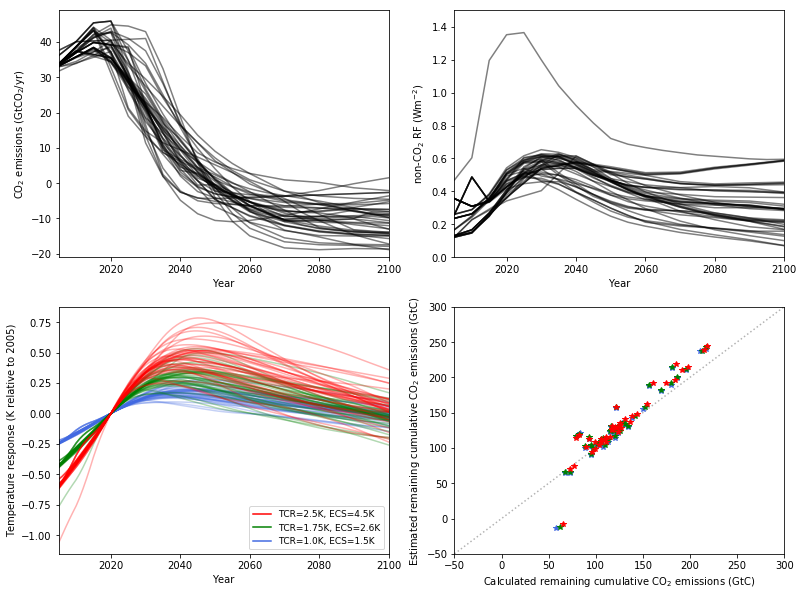

In [51]:
# what is the year we run the comparison from (chosen because we need 20 years of non-CO2 forcing data find F_0)
year_val = 2020
non_co2_forcing_average_over = 15


fig_check, ax_check = plt.subplots(2,2, figsize=(13,10))
ax_check[0,0].set_xlabel('Year')
ax_check[0,0].set_ylabel('CO$_2$ emissions (GtCO$_2$/yr)')
ax_check[0,1].set_xlabel('Year')
ax_check[0,1].set_ylabel('non-CO$_2$ RF (Wm$^{-2}$)')
ax_check[1,0].set_xlabel('Year')
ax_check[1,0].set_ylabel('Temperature response (K relative to 2005)')
ax_check[1,1].set_xlabel('Calculated remaining cumulative CO$_2$ emissions (GtC)')
ax_check[1,1].set_ylabel('Estimated remaining cumulative CO$_2$ emissions (GtC)')
ax_check[1,1].plot([-50,400], [-50,400], ':', color='black', alpha=0.3)
ax_check[1,1].set_xlim(-50,300)
ax_check[1,1].set_ylim(-50,300)
ax_check[0,1].set_xlim(2005,2100)
ax_check[0,1].set_ylim(0,1.5)
ax_check[1,0].set_xlim(2005,2100)
# ax_check[1,0].set_ylim(0.0, 1.1)
ax_check[0,0].set_xlim(2005,2100)
ax_check[0,0].set_ylim(-21,49)




year_val = 2020
non_co2_forcing_average_over = 15

# Parameter values
TCR_val = 1.0
ECS_val = 1.5
d_array = np.array([239.0,4.1])
F_2x = 3.74
C_0 = 278.0
H = 100 # size of integration for AGWP calculation
input_yr = 10 # year of pulse CO2 injection to calc AGWP value
# produce pulse CO2 emissions timeseries
pulse_ems = np.zeros(150)
pulse_ems[input_yr] = 1000.
# run through FaIR with parameters (TCR,ECS,d,F_2x,C_0) as given above
C_pulse, T_pulse = fair_scm(emissions=pulse_ems, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x)
# calculate RF response from concentration response using log-relationship
RF_pulse = F_2x * np.log(C_pulse / C_0) / np.log(2)
# integrate for AGWP value in year H
AGWP = np.cumsum(RF_pulse)
# calculate TCRE value using formula in M. Allen et al.'s npj paper
TCRE = (TCR_val * AGWP[H+input_yr]) / (H * F_2x)

print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')
        
        
for scen in co2_ems_df.scenarios():
    for mod in co2_RF_df.filter(scenario=scen).models():
        scen_to_interpolate_co2ems = co2_ems_df.filter(scenario=scen,model=mod, variable='Emissions|CO2',region='World')
    
        vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').value
        index_vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').index
        vals_interp_co2ems = np.interp(np.arange(index_vals_co2ems[0],index_vals_co2ems[-1] + 1), index_vals_co2ems, vals_co2ems)

        
        # same for co2 forcing
        scen_to_interpolate_co2RF = co2_RF_df.filter(scenario=scen,model=mod, variable='Forcing|CO2',region='World').as_pandas()

        vals_co2RF = scen_to_interpolate_co2RF.value.values[scen_to_interpolate_co2RF.value.values!=0]
        index_vals_co2RF = scen_to_interpolate_co2RF.year.values[scen_to_interpolate_co2RF.value.values!=0]
        vals_interp_co2RF = np.interp(np.arange(index_vals_co2RF[0],index_vals_co2RF[-1]+1),index_vals_co2RF,vals_co2RF)

        
        # same for total forcing
        scen_to_interpolate_totRF = total_RF_df.filter(scenario=scen,model=mod, variable='Forcing',region='World').as_pandas()
    
        vals_totRF = scen_to_interpolate_totRF.value.values[scen_to_interpolate_totRF.value.values!=0]
        index_vals_totRF = scen_to_interpolate_totRF.year.values[scen_to_interpolate_totRF.value.values!=0]
        vals_interp_totRF = np.interp(np.arange(index_vals_totRF[0],index_vals_totRF[-1]+1),index_vals_totRF,vals_totRF)
    
        vals_non_co2_RF = vals_interp_totRF - vals_interp_co2RF
        full_index = np.arange(index_vals_co2RF[0],index_vals_co2RF[-1] + 1)
    
    
        # run each scenario through FaIR
        C_run, T_run = fair_scm(emissions=vals_interp_co2ems*12./44000., other_rf=vals_interp_totRF-vals_interp_co2RF, tcrecs=np.array([TCR_val,ECS_val]), d=d_array)
        
#         ax_check[0,0].plot(full_index, vals_interp_co2ems/1000., color='black',alpha=0.5)
#         ax_check[0,1].plot(full_index, vals_non_co2_RF, color='black',alpha=0.5)
        ax_check[1,0].plot(full_index, T_run - T_run[full_index == year_val], color='royalblue', alpha=0.3, linewidth=1.5)

        
        # find epsilon and carbon budget to temp peak
        temp_peak_val = np.max(T_run)
        year_of_temp_peak = full_index[T_run == temp_peak_val]
        epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])
        
        F_1 = np.mean(vals_non_co2_RF[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
        F_0 = np.mean(vals_non_co2_RF[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))]) # 0.1
        
#         print(F_0, "\t", F_1)
#         print((epsilon * F_0 * (year_of_temp_peak-year_val))*H*1000/AGWP[H+input_yr])
        
        G_estimated = (((temp_peak_val-T_run[full_index == year_val]) / TCRE) - ((H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_0)) / (AGWP[H+input_yr])))*1000.
        
        G_calculated = np.sum(vals_interp_co2ems[full_index<=year_of_temp_peak]*12./44000.) - np.sum(vals_interp_co2ems[full_index<=year_val]*12./44000.)
        
        ax_check[1,1].plot(G_calculated, G_estimated, '*', color='royalblue') 

# --------------------------------------------
  
    
year_val = 2020
non_co2_forcing_average_over = 15    
    
# Parameter values
TCR_val = 1.75
ECS_val = 2.6
d_array = np.array([239.0,4.1])
F_2x = 3.74
C_0 = 278.0
H = 100 # size of integration for AGWP calculation
input_yr = 10 # year of pulse CO2 injection to calc AGWP value
# produce pulse CO2 emissions timeseries
pulse_ems = np.zeros(150)
pulse_ems[input_yr] = 1000.
# run through FaIR with parameters (TCR,ECS,d,F_2x,C_0) as given above
C_pulse, T_pulse = fair_scm(emissions=pulse_ems, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x)
# calculate RF response from concentration response using log-relationship
RF_pulse = F_2x * np.log(C_pulse / C_0) / np.log(2)
# integrate for AGWP value in year H
AGWP = np.cumsum(RF_pulse)
# calculate TCRE value using formula in M. Allen et al.'s npj paper
TCRE = (TCR_val * AGWP[H+input_yr]) / (H * F_2x)

print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')

# interpolate data to 1-year spacing and find temperature response      

for scen in co2_ems_df.scenarios():
    for mod in co2_RF_df.filter(scenario=scen).models():
        scen_to_interpolate_co2ems = co2_ems_df.filter(scenario=scen,model=mod, variable='Emissions|CO2',region='World')
    
        vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').value
        index_vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').index
        vals_interp_co2ems = np.interp(np.arange(index_vals_co2ems[0],index_vals_co2ems[-1] + 1), index_vals_co2ems, vals_co2ems)

        
        # same for co2 forcing
        scen_to_interpolate_co2RF = co2_RF_df.filter(scenario=scen,model=mod, variable='Forcing|CO2',region='World').as_pandas()

        vals_co2RF = scen_to_interpolate_co2RF.value.values[scen_to_interpolate_co2RF.value.values!=0]
        index_vals_co2RF = scen_to_interpolate_co2RF.year.values[scen_to_interpolate_co2RF.value.values!=0]
        vals_interp_co2RF = np.interp(np.arange(index_vals_co2RF[0],index_vals_co2RF[-1]+1),index_vals_co2RF,vals_co2RF)

        
        # same for total forcing
        scen_to_interpolate_totRF = total_RF_df.filter(scenario=scen,model=mod, variable='Forcing',region='World').as_pandas()
    
        vals_totRF = scen_to_interpolate_totRF.value.values[scen_to_interpolate_totRF.value.values!=0]
        index_vals_totRF = scen_to_interpolate_totRF.year.values[scen_to_interpolate_totRF.value.values!=0]
        vals_interp_totRF = np.interp(np.arange(index_vals_totRF[0],index_vals_totRF[-1]+1),index_vals_totRF,vals_totRF)
    
        vals_non_co2_RF = vals_interp_totRF - vals_interp_co2RF
        full_index = np.arange(index_vals_co2RF[0],index_vals_co2RF[-1] + 1)
    
    
        # run each scenario through FaIR
        C_run, T_run = fair_scm(emissions=vals_interp_co2ems*12./44000., other_rf=vals_interp_totRF-vals_interp_co2RF, tcrecs=np.array([TCR_val,ECS_val]), d=d_array)
        
#         ax_check[0,0].plot(full_index, vals_interp_co2ems/1000., color='black',alpha=0.5)
#         ax_check[0,1].plot(full_index, vals_non_co2_RF, color='black',alpha=0.5)
        ax_check[1,0].plot(full_index, T_run - T_run[full_index == year_val], color='green', alpha=0.3, linewidth=1.5)

        
        # find epsilon and carbon budget to temp peak
        temp_peak_val = np.max(T_run)
        year_of_temp_peak = full_index[T_run == temp_peak_val]
        epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])
        
        F_1 = np.mean(vals_non_co2_RF[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
        F_0 = np.mean(vals_non_co2_RF[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))]) # 0.1
        
#         print(F_0, "\t", F_1)
#         print((epsilon * F_0 * (year_of_temp_peak-year_val))*H*1000/AGWP[H+input_yr])
        
        G_estimated = (((temp_peak_val-T_run[full_index == year_val]) / TCRE) - ((H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_0)) / (AGWP[H+input_yr])))*1000.
        
        G_calculated = np.sum(vals_interp_co2ems[full_index<=year_of_temp_peak]*12./44000.) - np.sum(vals_interp_co2ems[full_index<=year_val]*12./44000.)
        
        ax_check[1,1].plot(G_calculated, G_estimated, '*', color='green')

        

# --------------------------------------------


year_val = 2020
non_co2_forcing_average_over = 15

# Parameter values
TCR_val = 2.5
ECS_val = 4.5
d_array = np.array([239.0,4.1])
F_2x = 3.74
C_0 = 278.0
H = 100 # size of integration for AGWP calculation
input_yr = 10 # year of pulse CO2 injection to calc AGWP value
# produce pulse CO2 emissions timeseries
pulse_ems = np.zeros(150)
pulse_ems[input_yr] = 1000.
# run through FaIR with parameters (TCR,ECS,d,F_2x,C_0) as given above
C_pulse, T_pulse = fair_scm(emissions=pulse_ems, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x)
# calculate RF response from concentration response using log-relationship
RF_pulse = F_2x * np.log(C_pulse / C_0) / np.log(2)
# integrate for AGWP value in year H
AGWP = np.cumsum(RF_pulse)
# calculate TCRE value using formula in M. Allen et al.'s npj paper
TCRE = (TCR_val * AGWP[H+input_yr]) / (H * F_2x)

print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')
        
        
for scen in co2_ems_df.scenarios():
    for mod in co2_RF_df.filter(scenario=scen).models():
        scen_to_interpolate_co2ems = co2_ems_df.filter(scenario=scen,model=mod, variable='Emissions|CO2',region='World')
    
        vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').value
        index_vals_co2ems = scen_to_interpolate_co2ems.as_pandas().set_index('year').index
        vals_interp_co2ems = np.interp(np.arange(index_vals_co2ems[0],index_vals_co2ems[-1] + 1), index_vals_co2ems, vals_co2ems)

        
        # same for co2 forcing
        scen_to_interpolate_co2RF = co2_RF_df.filter(scenario=scen,model=mod, variable='Forcing|CO2',region='World').as_pandas()

        vals_co2RF = scen_to_interpolate_co2RF.value.values[scen_to_interpolate_co2RF.value.values!=0]
        index_vals_co2RF = scen_to_interpolate_co2RF.year.values[scen_to_interpolate_co2RF.value.values!=0]
        vals_interp_co2RF = np.interp(np.arange(index_vals_co2RF[0],index_vals_co2RF[-1]+1),index_vals_co2RF,vals_co2RF)

        
        # same for total forcing
        scen_to_interpolate_totRF = total_RF_df.filter(scenario=scen,model=mod, variable='Forcing',region='World').as_pandas()
    
        vals_totRF = scen_to_interpolate_totRF.value.values[scen_to_interpolate_totRF.value.values!=0]
        index_vals_totRF = scen_to_interpolate_totRF.year.values[scen_to_interpolate_totRF.value.values!=0]
        vals_interp_totRF = np.interp(np.arange(index_vals_totRF[0],index_vals_totRF[-1]+1),index_vals_totRF,vals_totRF)
    
        vals_non_co2_RF = vals_interp_totRF - vals_interp_co2RF
        full_index = np.arange(index_vals_co2RF[0],index_vals_co2RF[-1] + 1)
    
    
        # run each scenario through FaIR
        C_run, T_run = fair_scm(emissions=vals_interp_co2ems*12./44000., other_rf=vals_interp_totRF-vals_interp_co2RF, tcrecs=np.array([TCR_val,ECS_val]), d=d_array)
        
        ax_check[0,0].plot(full_index, vals_interp_co2ems/1000., color='black',alpha=0.5, linewidth=1.5)
        ax_check[0,1].plot(full_index, vals_non_co2_RF, color='black',alpha=0.5, linewidth=1.5)
        ax_check[1,0].plot(full_index, T_run - T_run[full_index == year_val], color='red', alpha=0.3, linewidth=1.5)

        
        # find epsilon and carbon budget to temp peak
        temp_peak_val = np.max(T_run)
        year_of_temp_peak = full_index[T_run == temp_peak_val]
        epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])
        
        F_1 = np.mean(vals_non_co2_RF[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
        F_0 = np.mean(vals_non_co2_RF[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))]) # 0.1
        
        G_estimated = (((temp_peak_val-T_run[full_index == year_val]) / TCRE) - ((H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_0)) / (AGWP[H+input_yr])))*1000.
        
        G_calculated = np.sum(vals_interp_co2ems[full_index<=year_of_temp_peak]*12./44000.) - np.sum(vals_interp_co2ems[full_index<=year_val]*12./44000.)
        
        ax_check[1,1].plot(G_calculated, G_estimated, '*', color='red')        

        
        
legend_elements0 = [Line2D([0], [0], color='red', label='TCR=2.5K, ECS=4.5K'),
                   Line2D([0], [0], color='green', label='TCR=1.75K, ECS=2.6K'),
                   Line2D([0], [0], color='royalblue', label='TCR=1.0K, ECS=1.5K')]

ax_check[1,0].legend(handles=legend_elements0, loc='best', fontsize=9)        
        
# fig_check.savefig('all_scens_tcr_ecs_range.pdf',dpi=300)